In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import itertools
import env
import wrangle
import acquire
import prepare
import split
import exploration as exp

initial data -> taxdollarvaluecnt, bedroomcnt, bathroomcnt, yearbuilt, fips, parcelid, square feet               
**hypotheses:**
   > more bedrooms increase house price                                                                            
   > more bathrooms increase house price                                                                          
   > larger square feet increases house price                                                                     
   > yearbuilt is related to house price (more recent is more valuable than older homes)                           
   > counties will have different average tax amounts                                                              
   
## Notes:

> * we only have data for 3 california counties -> the model is more predictive of this area
> * we could get more predictive by making models for these counties individually
    
    

### Ex 1 & 2: As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
zillow, cats, quants  = wrangle.wrangle_zillow()

df = zillow.drop(columns=['taxamount', 'latitude', 
                          'longitude'])
target_var = 'taxvaluedollarcnt'
df.head()

Index(['bedroomcnt', 'bathroomcnt', 'sqr_ft', 'taxvaluedollarcnt', 'yearbuilt',
       'taxamount'],
      dtype='object')
(52243, 10)
(51120, 10)


,parcelid,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,yearbuilt,county
0,14297519,4.0,3.5,3100.0,1023282.0,1998.0,orange_county
1,17052889,2.0,1.0,1465.0,464000.0,1967.0,ventura
2,14186244,3.0,2.0,1243.0,564778.0,1962.0,orange_county
3,12177905,4.0,3.0,2376.0,145143.0,1970.0,los_angeles
4,12095076,4.0,3.0,2962.0,773303.0,1950.0,los_angeles


In [3]:
train, validate, test = split.train_validate_test_split(df, target_var)

quants = train.drop(columns=['county', 'parcelid']).columns
continuous = ['bedroomcnt', 'bathroomcnt', 'sqr_ft', 'taxvaluedollarcnt', 'yearbuilt']
cats = ['county']

train.head()

,parcelid,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,yearbuilt,county
37081,14282205,3.0,2.0,1604.0,667392.0,1956.0,orange_county
22281,17075855,4.0,3.0,2850.0,475634.0,1978.0,ventura
11886,13848424,3.0,1.0,1049.0,306402.0,1949.0,orange_county
37130,11008244,4.0,3.0,2505.0,278696.0,1986.0,los_angeles
21594,13068561,3.0,3.0,2616.0,500852.0,1984.0,los_angeles


## EX 3: Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

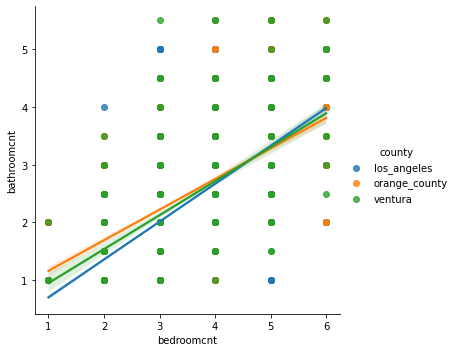

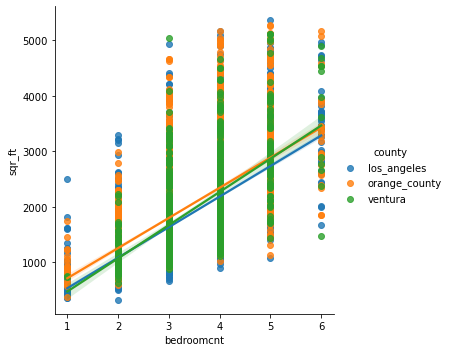

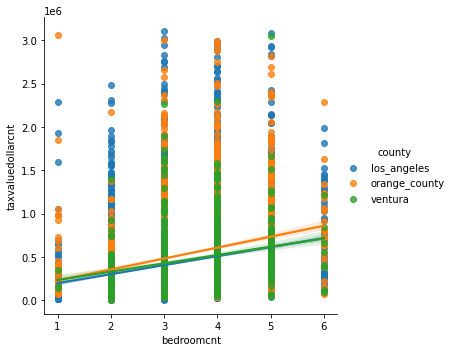

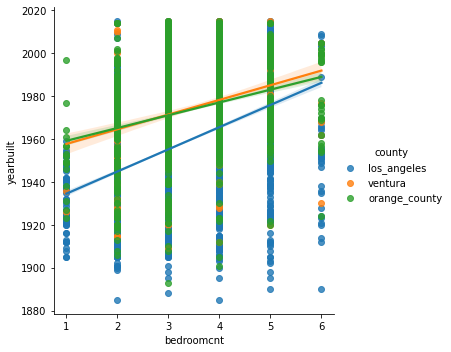

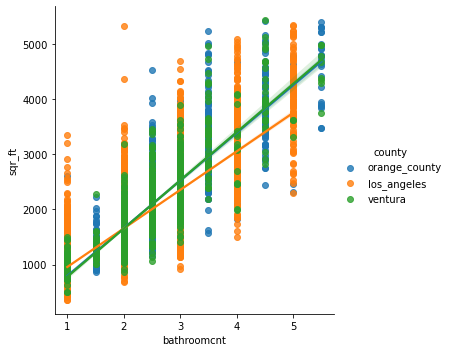

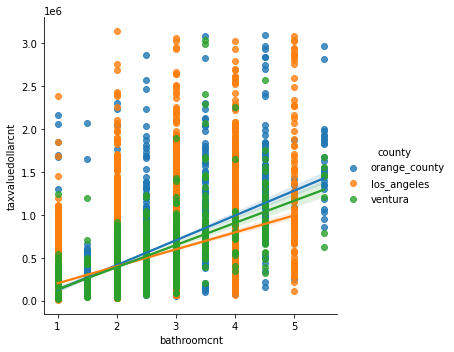

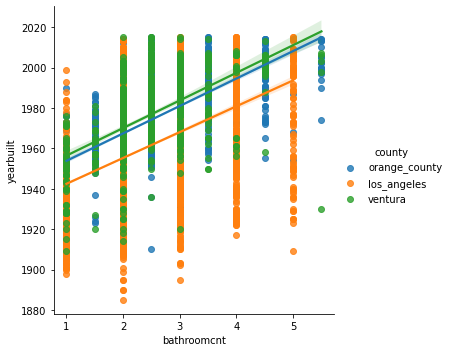

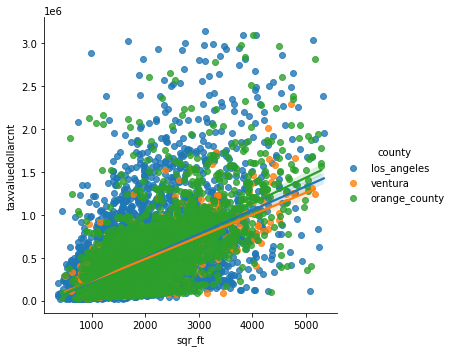

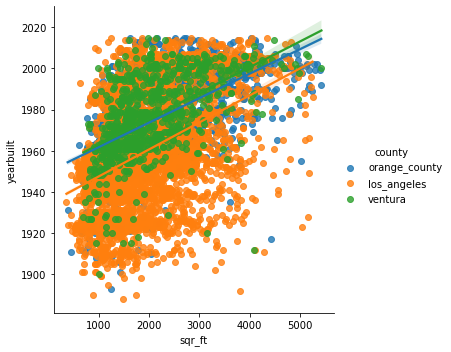

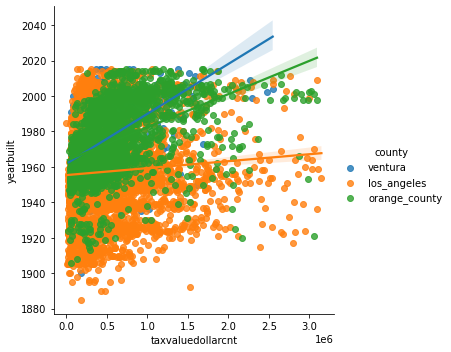

In [4]:
exp.plot_variable_pairs(train, quants)


## EX 4: Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

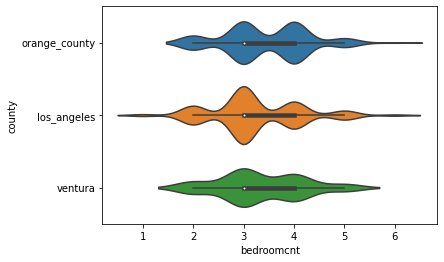

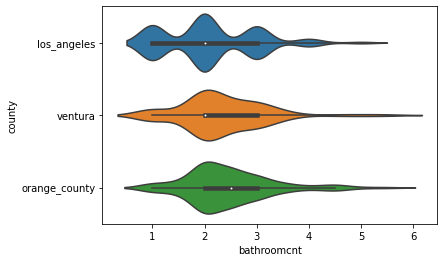

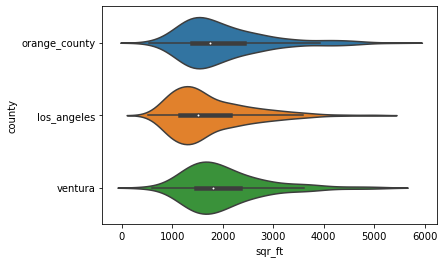

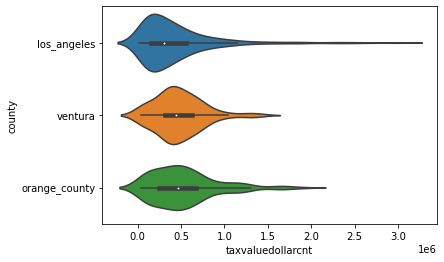

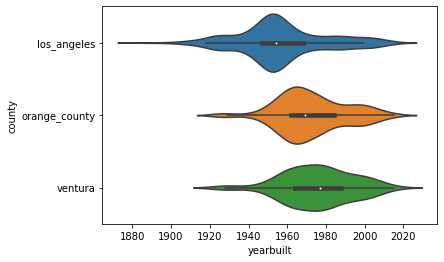

In [5]:

    
exp.plot_categorical_and_continuous_vars(df, continuous, cats)
    

## EX 5: Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

Index(['bedroomcnt', 'bathroomcnt', 'sqr_ft', 'taxvaluedollarcnt',
       'yearbuilt'],
      dtype='object')


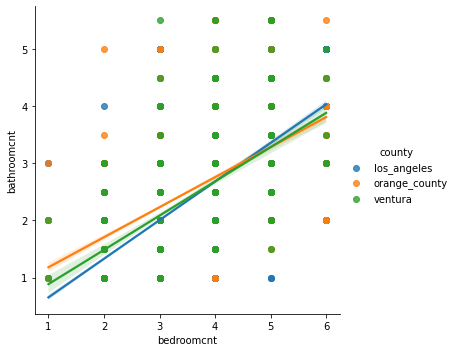

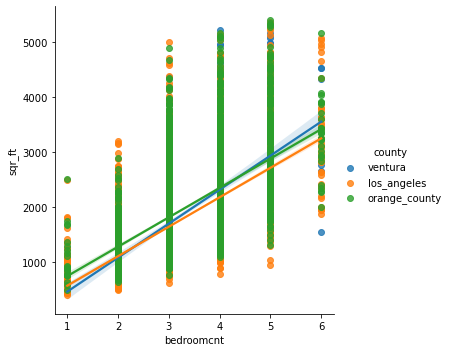

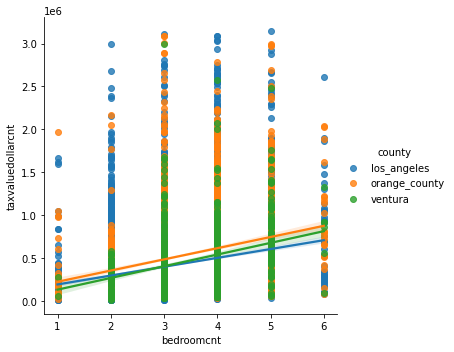

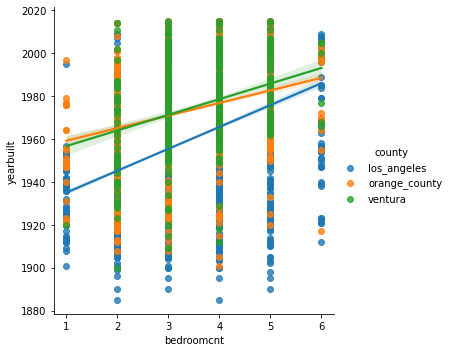

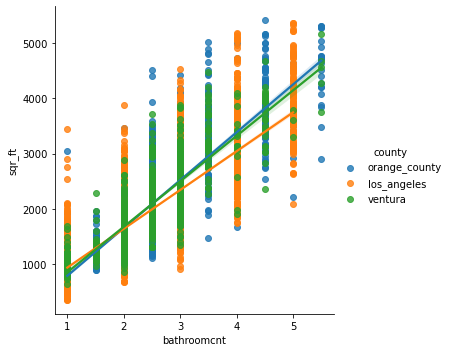

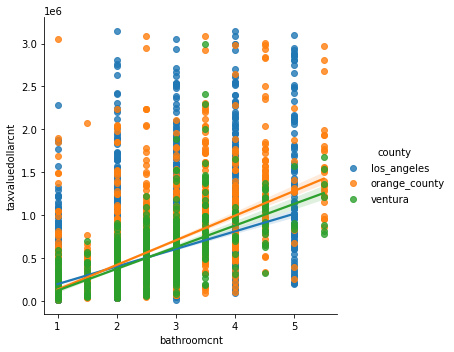

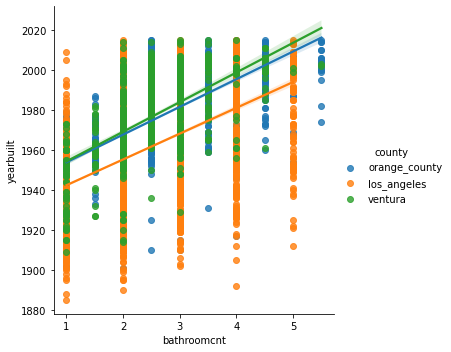

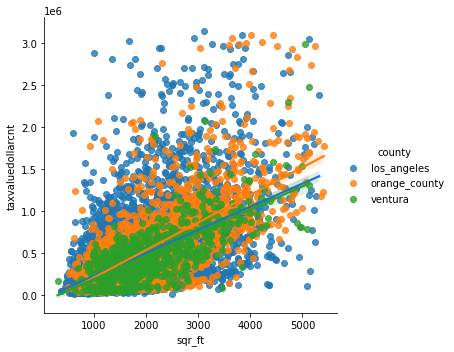

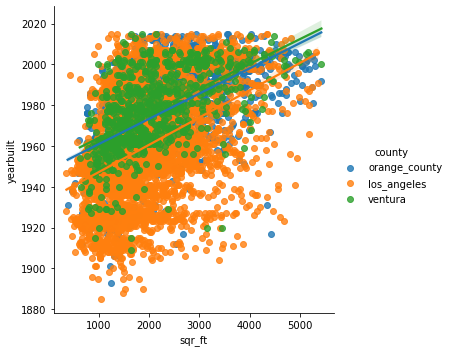

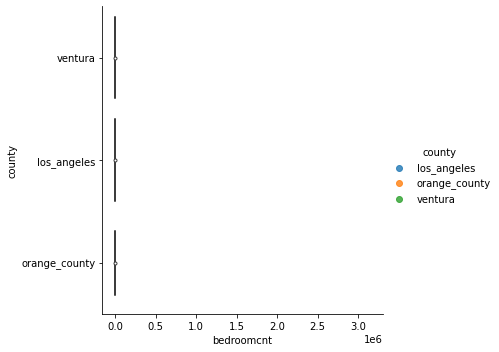

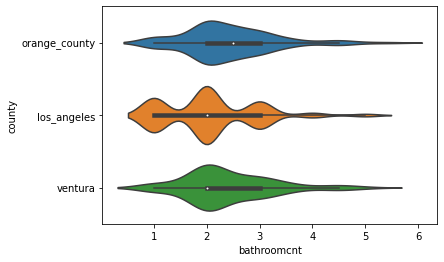

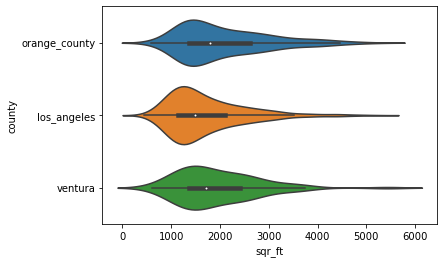

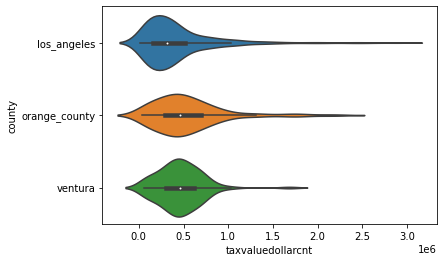

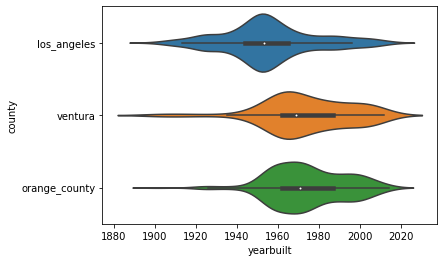

In [6]:
print(quants)

exp.plot_variable_pairs(train, quants)
exp.plot_categorical_and_continuous_vars(train, continuous, cats)

# Possible ideas:
  # - Create area shader of violin plot for decades/ranges of highest area
  #  EX: the 60's have the most houses built in la county

## EX 6: Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

## EX 7: Come up with some initial hypotheses based on your goal of predicting property value.



See initial paragraph above

## EX 8: Visualize all combinations of variables in some way.

See above ^

## EX 9: Run the appropriate statistical tests where needed.

<AxesSubplot:>

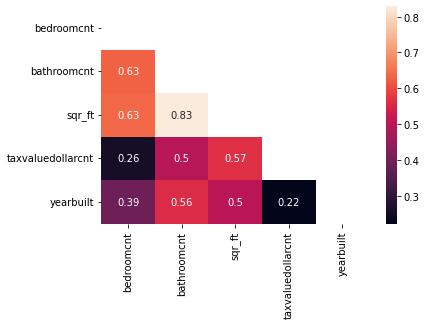

In [7]:
#cont vs categorical 

# correlation testing (cont vs cont for linear relationships)
quant_df = train[quants]
corr = quant_df.corr()

sns.heatmap(corr, annot=True, mask=np.triu(corr))

## EX 10: What independent variables are correlated with the dependent variable, home value?

In [8]:
# bathroomcnt and square feet

## EX 11: Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

bathroom count and square feet, bedroomcnt and square feet,
bathroomcnt and square feet

## EX 12: Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

# to-do:
  - Identify statistical test to test relationships between continuous variables
  - Create hypotheses for those statistical tests
  - Identify Categorical to continuous tests
  - prepare visualizations of heatmaps (both geographical and corr heatmap) choose visualizations for why I chose to hypothesis test specific variables over other variables





## EX 13: Explore your dataset with any other visualizations you think will be helpful.

In [9]:
# pearson r corr
results_dict = exp.pearsonr_quants(quants, train)
    
target_var_pearson_r = exp.pearsonr_remove_non_target_var(results_dict, target_var)

exp.print_dictionary_items(target_var_pearson_r)



bedroomcnt:        bathroomcnt:
(0.6277855655973794, 0.0)
bedroomcnt:        sqr_ft:
(0.6348612663089418, 0.0)
bedroomcnt:        taxvaluedollarcnt:
(0.25646184365194924, 0.0)
bedroomcnt:        yearbuilt:
(0.3923617389867631, 0.0)
bathroomcnt:        sqr_ft:
(0.8292433436208233, 0.0)
bathroomcnt:        taxvaluedollarcnt:
(0.49635469776282926, 0.0)
bathroomcnt:        yearbuilt:
(0.5570558437439014, 0.0)
sqr_ft:        taxvaluedollarcnt:
(0.565484522095982, 0.0)
sqr_ft:        yearbuilt:
(0.499174835659485, 0.0)
taxvaluedollarcnt:        yearbuilt:
(0.2213460512198099, 1.220373321e-314)

('bedroomcnt', 'taxvaluedollarcnt')
(0.25646184365194924, 0.0)

('bathroomcnt', 'taxvaluedollarcnt')
(0.49635469776282926, 0.0)

('sqr_ft', 'taxvaluedollarcnt')
(0.565484522095982, 0.0)

('taxvaluedollarcnt', 'yearbuilt')
(0.2213460512198099, 1.220373321e-314)


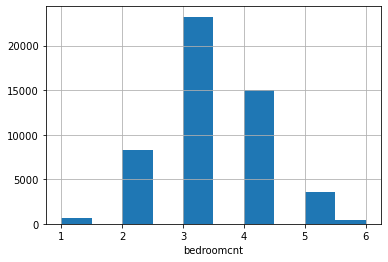

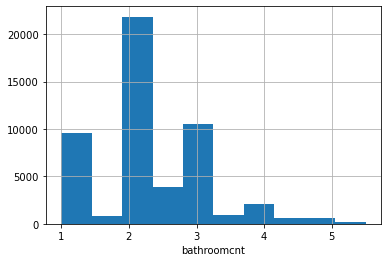

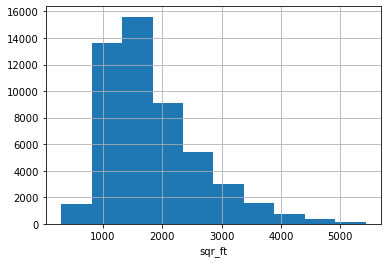

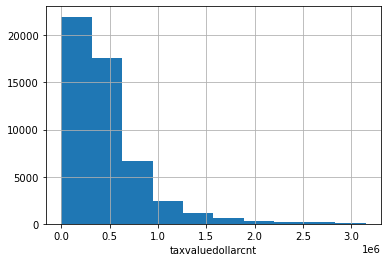

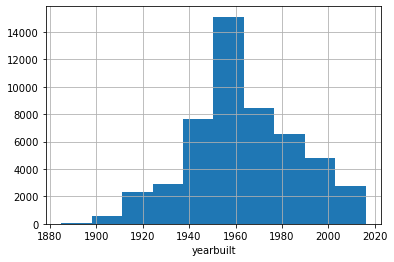

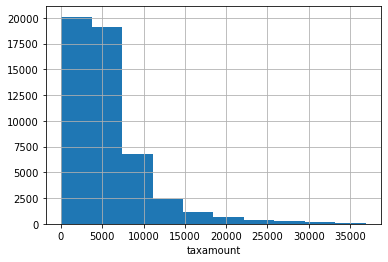

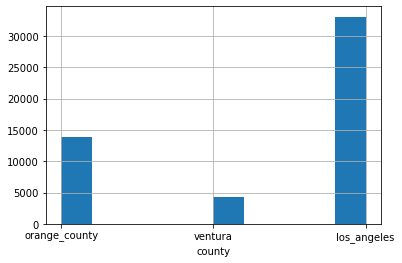

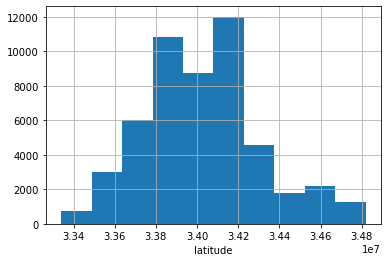

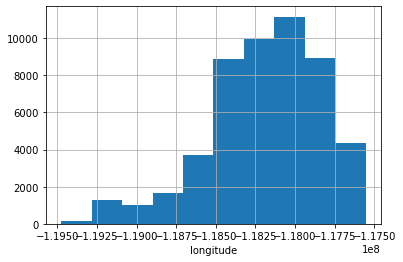

In [10]:
exp.zillow_univariate_hists(zillow)

normal distributions: bedroomcnt, bathroomcnt -> t-test viable?
every other continuous split by category -> manwhitneyu

Two most correlated variables to target var: bathroomcnt, sqr feet

Questions I can ask with Ttest/manwhitneyu:

Does any variable have more or less than the average of the group? (bedrooms, bathrooms, square feet, etc.)

Is any variable in one county greater than/less than another county?



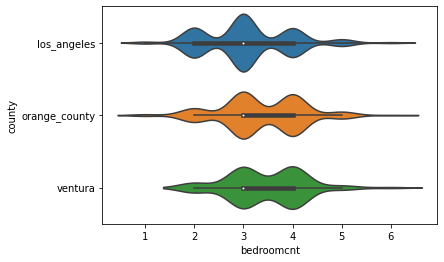

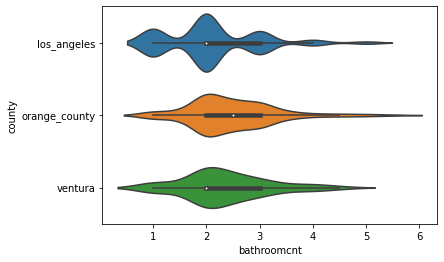

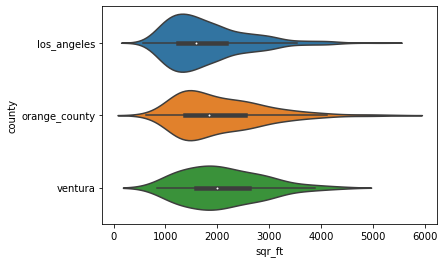

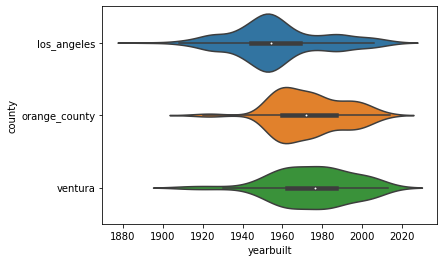

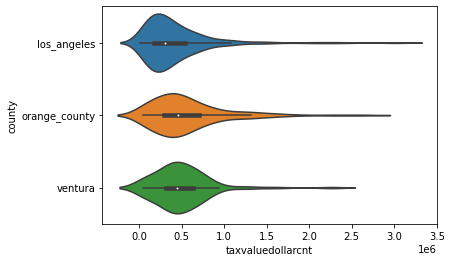

In [11]:
continuous = ['bedroomcnt', 'bathroomcnt', 'sqr_ft', 'yearbuilt', 'taxvaluedollarcnt']

exp.plot_categorical_and_continuous_vars(train, continuous, cats)

In [12]:
train = exp.add_back_to_train(train, zillow, 'latitude', 'parcelid')

    
train = exp.add_back_to_train(train, zillow, 'longitude', 'parcelid')
train.head()
zillow.shape


KeyboardInterrupt: 

In [13]:
prices, grids, lat_coords, lon_coords, sqr_ft, resolution = exp.create_map_data(train, resolution=75,
                                                                            sample=len(train))


AttributeError: 'DataFrame' object has no attribute 'latitude'

In [ ]:
county_dfs = exp.create_display_heatmap(prices, grids, lat_coords, lon_coords, sqr_ft, resolution,
                       counties=['la', 'oc', 'ventura'], option='price_per_sqr_ft')



In [14]:


x_train_scaled, y_train, \
x_validate_scaled, y_validate, \
x_test_scaled, y_test = wrangle.encoded_and_scaled(train, validate, test, target_var)


In [15]:
columns = {'bedroomcnt': 'scaled_bedroomcnt',
                       'bathroomcnt': 'scaled_bathroomcnt',
                       'sqr_ft': 'scaled_sqr_ft',
                       'yearbuilt': 'scaled_yearbuilt',
                       'county_orange_county': 'scaled_OC',
                       'county_ventura' : 'scaled_ventura'}

x_train_scaled = x_train_scaled.rename(columns=columns)
x_validate_scaled = x_validate_scaled.rename(columns=columns)
x_test_scaled = x_test_scaled.rename(columns=columns)
x_train_scaled.head()

train = pd.concat([train.reset_index(), x_train_scaled], axis=1)
validate = pd.concat([validate.reset_index(), x_validate_scaled], axis=1)
test = pd.concat([test.reset_index(), x_test_scaled], axis=1)
train.head()

,index,parcelid,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,yearbuilt,county,scaled_bedroomcnt,scaled_bathroomcnt,scaled_sqr_ft,scaled_yearbuilt,scaled_OC,scaled_ventura
0,37081,14282205,3.0,2.0,1604.0,667392.0,1956.0,orange_county,0.0,0.0,-0.032258,-0.142857,1.0,0.0
1,22281,17075855,4.0,3.0,2850.0,475634.0,1978.0,ventura,1.0,1.0,1.223790,0.642857,0.0,1.0
2,11886,13848424,3.0,1.0,1049.0,306402.0,1949.0,orange_county,0.0,-1.0,-0.591734,-0.392857,1.0,0.0
3,37130,11008244,4.0,3.0,2505.0,278696.0,1986.0,los_angeles,1.0,1.0,0.876008,0.928571,0.0,0.0
4,21594,13068561,3.0,3.0,2616.0,500852.0,1984.0,los_angeles,0.0,1.0,0.987903,0.857143,0.0,0.0


In [16]:
validate.head()

,index,parcelid,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,yearbuilt,county,scaled_bedroomcnt,scaled_bathroomcnt,scaled_sqr_ft,scaled_yearbuilt,scaled_OC,scaled_ventura
0,13724,14011144,4.0,2.0,1988.0,471440.0,1969.0,orange_county,1.0,0.0,0.354839,0.321429,1.0,0.0
1,44003,11176939,5.0,4.0,3066.0,489143.0,2001.0,los_angeles,2.0,2.0,1.441532,1.464286,0.0,0.0
2,30514,11321061,5.0,3.0,2880.0,337862.0,1998.0,los_angeles,2.0,1.0,1.254032,1.357143,0.0,0.0
3,19627,14176085,3.0,2.0,1696.0,461236.0,1954.0,orange_county,0.0,0.0,0.060484,-0.214286,1.0,0.0
4,21539,12142228,4.0,3.0,2128.0,1346193.0,1969.0,los_angeles,1.0,1.0,0.495968,0.321429,0.0,0.0
